<a href="https://colab.research.google.com/github/xVILENx/Dengue_SINAN/blob/main/graf_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

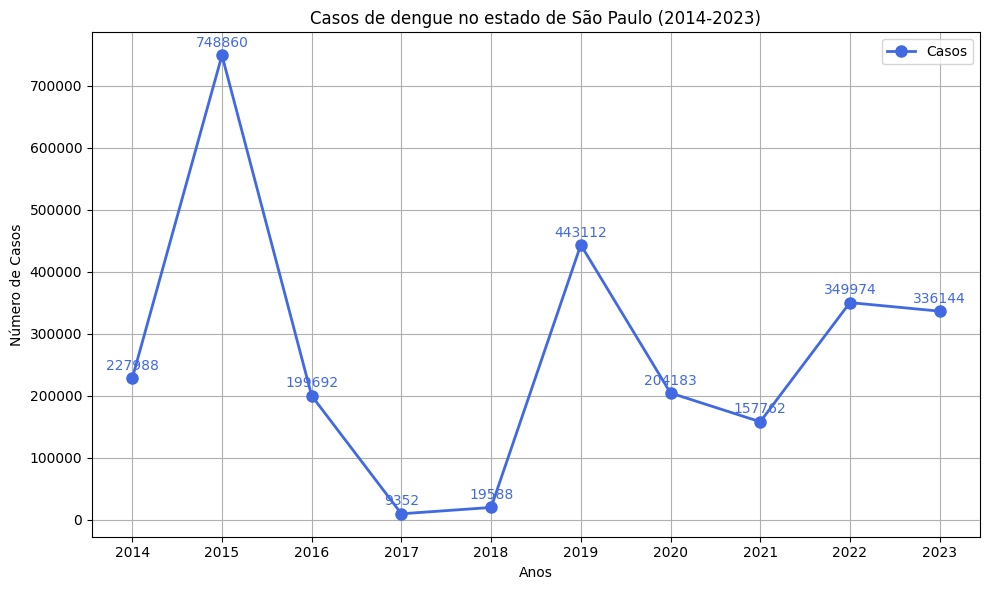

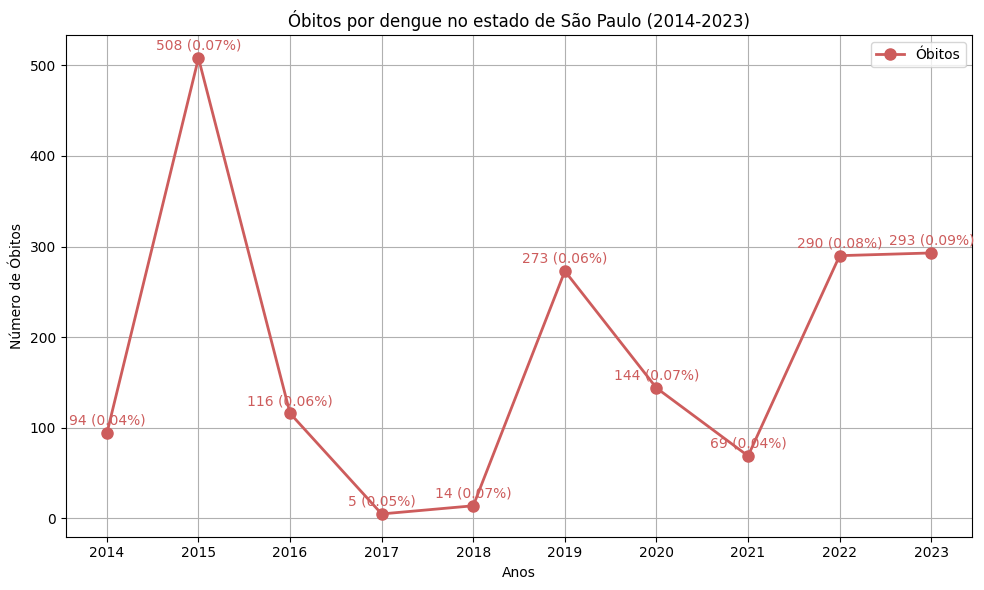

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import auth
from googleapiclient.discovery import build
from google.auth.transport.requests import Request
from google.auth import default

# Autenticar e criar o serviço da API Google Sheets
auth.authenticate_user()
creds, _ = default()
creds.refresh(Request())
service = build('sheets', 'v4', credentials=creds)

# Função para ler dados da Google Sheets
def get_sheet_data(spreadsheet_id, range_name):
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=spreadsheet_id, range=range_name).execute()
    values = result.get('values', [])
    return values[0] if values else []

# ID da planilha do Google Sheets
spreadsheet_id = '1_9RDRSbd5Uo__vNQz5yKVoyumJtk7qTN_F3AVmLTEbs'

# Definir os ranges para "casos" e "obitos"
range_casos = 'casos!B19:K19'
range_obitos = 'obitos!B19:K19'

# Obter os dados
casos = list(map(int, get_sheet_data(spreadsheet_id, range_casos)))
obitos = list(map(int, get_sheet_data(spreadsheet_id, range_obitos)))

# Definir os anos
anos = list(range(2014, 2023 + 1))

# Plotar o gráfico de linhas para casos
plt.figure(figsize=(10, 6))
plt.plot(anos, casos, marker='o', color='royalblue', linestyle='-', linewidth=2, markersize=8, label='Casos')
plt.xlabel('Anos')
plt.ylabel('Número de Casos')
plt.title('Casos de dengue no estado de São Paulo (2014-2023)')
plt.xticks(anos)

# Adicionar anotações acima de cada ponto
for i, valor in enumerate(casos):
    plt.annotate(f'{valor}', (anos[i], casos[i]), textcoords="offset points", xytext=(0,6), ha='center', fontsize=10, color='royalblue')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular a taxa de letalidade
letalidade = [(o / c * 100) if c != 0 else 0 for o, c in zip(obitos, casos)]

# Plotar o gráfico de linhas para óbitos
plt.figure(figsize=(10, 6))
plt.plot(anos, obitos, marker='o', color='indianred', linestyle='-', linewidth=2, markersize=8, label='Óbitos')
plt.xlabel('Anos')
plt.ylabel('Número de Óbitos')
plt.title('Óbitos por dengue no estado de São Paulo (2014-2023)')
plt.xticks(anos)

# Adicionar anotações acima de cada ponto
for i, (valor, let) in enumerate(zip(obitos, letalidade)):
    plt.annotate(f'{valor} ({let:.2f}%)', (anos[i], obitos[i]), textcoords="offset points", xytext=(0,6), ha='center', fontsize=10, color='indianred')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()